In [1]:
from syft import Worker
import syft as sy
import numpy as np
import pandas as pd
worker = Worker.named("test-domain-1", processes=1, reset=False)
root_domain_client = worker.root_client

kj/filesystem-disk-unix.c++:1703: warning: PWD environment variable doesn't match current directory; pwd = /Users/koen/workspace/PySyft


SQLite Store Path:
!open file:///var/folders/q1/ryq93kwj055dlbpngxv1c7z40000gn/T/7bca415d13ed1ec841f0d0aede098dbb.sqlite

> Starting Worker: test-domain-1 - 7bca415d13ed1ec841f0d0aede098dbb - NodeType.DOMAIN - [<class 'syft.core.node.new.user_service.UserService'>, <class 'syft.core.node.new.metadata_service.MetadataService'>, <class 'syft.core.node.new.action_service.ActionService'>, <class 'syft.core.node.new.test_service.TestService'>, <class 'syft.core.node.new.dataset_service.DatasetService'>, <class 'syft.core.node.new.user_code_service.UserCodeService'>, <class 'syft.core.node.new.request_service.RequestService'>, <class 'syft.core.node.new.data_subject_service.DataSubjectService'>, <class 'syft.core.node.new.network_service.NetworkService'>, <class 'syft.core.node.new.policy_service.PolicyService'>, <class 'syft.core.node.new.message_service.MessageService'>, <class 'syft.core.node.new.project_service.ProjectService'>, <class 'syft.core.node.new.data_subject_member_service.Data

# Summary
By the end of this chapter, we're going to have downloaded all of Canada's weather data for 2012, and saved it to a CSV.

We'll do this by downloading it one month at a time, and then combining all the months together.

## Get mocks

In [2]:
guest_domain_client = worker.guest_client
guest_client = guest_domain_client.login(email="jane@caltech.edu", password="abc123")

In [3]:
ds = guest_domain_client.datasets[0]

In [4]:
ds.assets

,key,type,id
0,weather1,syft.core.node.new.dataset.Asset,d5651e8861b947b6823632fb8d33a12d
1,weather2,syft.core.node.new.dataset.Asset,c985714e87e84428b324fbe1926b00fe
2,weather3,syft.core.node.new.dataset.Asset,ec991620783b462981bb67ca2b290b6c
3,weather4,syft.core.node.new.dataset.Asset,ccccc4c52c3143b1a44675dd9ff17eba
4,weather5,syft.core.node.new.dataset.Asset,176593abc0b2457cb513066490457044


## Downloading one month of weather data

When playing with the cycling data, I wanted temperature and precipitation data to find out if people like biking when it's raining. So I went to the site for Canadian historical weather data, and figured out how to get it automatically.

Here we're going to get the data for March 2012, and clean it up

In [5]:
url_template = "weather{month}"

To get the data for March 2013, we need to format it with `month=3`, `year=2012.`


In [6]:
url = url_template.format(month=3, year=2012)

In [7]:
asset = ds.assets[url]
weather_mar2012 = asset.mock

This is super great! We can just use the this mock directly, and just give it a URL as a filename. Awesome.
Here's the resulting dataframe.

In [8]:
weather_mar2012

,Longitude (x),Latitude (y),Station Name,Climate ID,Year,Month,Day,Time (LST),Temp (°C),Temp Flag,...,Wind Spd Flag,Visibility (km),Visibility Flag,Stn Press (kPa),Stn Press Flag,Hmdx,Hmdx Flag,Wind Chill,Wind Chill Flag,Weather
2010-06-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-8.227724,NaN,...,NaN,7.450238,NaN,84.926460,NaN,NaN,NaN,NaN,NaN,"Thunderstorms,Rain Showers"
2010-06-02,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.095293,NaN,...,NaN,25.599119,NaN,50.364978,NaN,NaN,NaN,NaN,NaN,"Thunderstorms,Rain"
2010-06-03,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,37.573867,NaN,...,NaN,24.942514,NaN,75.092259,NaN,NaN,NaN,NaN,NaN,"Rain,Snow"
2010-06-04,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,9.876657,NaN,...,NaN,14.885879,NaN,65.334434,NaN,NaN,NaN,NaN,NaN,Freezing Rain
2010-06-05,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,33.139091,NaN,...,NaN,28.812411,NaN,98.747225,NaN,NaN,NaN,NaN,NaN,Fog
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2012-06-09,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,36.048847,NaN,...,NaN,6.639669,NaN,96.373270,NaN,NaN,NaN,NaN,NaN,"Snow Showers,Fog"
2012-06-10,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,27.513107,NaN,...,NaN,21.735786,NaN,87.432125,NaN,NaN,NaN,NaN,NaN,Freezing Drizzle
2012-06-11,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,15.476591,NaN,...,NaN,19.352900,NaN,55.686740,NaN,NaN,NaN,NaN,NaN,"Snow,Fog"
2012-06-12,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,11.576134,NaN,...,NaN,19.406483,NaN,84.728135,NaN,NaN,NaN,NaN,NaN,"Drizzle,Snow"


<AxesSubplot: >

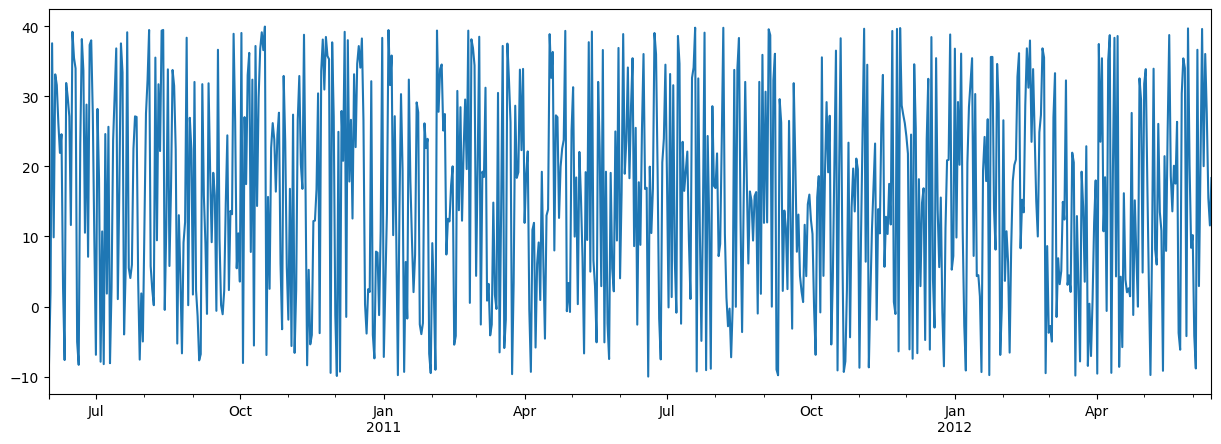

In [9]:
weather_mar2012[u"Temp (°C)"].plot(figsize=(15, 5))

In [10]:
asset.mock

,Longitude (x),Latitude (y),Station Name,Climate ID,Year,Month,Day,Time (LST),Temp (°C),Temp Flag,...,Wind Spd Flag,Visibility (km),Visibility Flag,Stn Press (kPa),Stn Press Flag,Hmdx,Hmdx Flag,Wind Chill,Wind Chill Flag,Weather
2010-06-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-8.227724,NaN,...,NaN,7.450238,NaN,84.926460,NaN,NaN,NaN,NaN,NaN,"Thunderstorms,Rain Showers"
2010-06-02,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.095293,NaN,...,NaN,25.599119,NaN,50.364978,NaN,NaN,NaN,NaN,NaN,"Thunderstorms,Rain"
2010-06-03,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,37.573867,NaN,...,NaN,24.942514,NaN,75.092259,NaN,NaN,NaN,NaN,NaN,"Rain,Snow"
2010-06-04,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,9.876657,NaN,...,NaN,14.885879,NaN,65.334434,NaN,NaN,NaN,NaN,NaN,Freezing Rain
2010-06-05,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,33.139091,NaN,...,NaN,28.812411,NaN,98.747225,NaN,NaN,NaN,NaN,NaN,Fog
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2012-06-09,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,36.048847,NaN,...,NaN,6.639669,NaN,96.373270,NaN,NaN,NaN,NaN,NaN,"Snow Showers,Fog"
2012-06-10,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,27.513107,NaN,...,NaN,21.735786,NaN,87.432125,NaN,NaN,NaN,NaN,NaN,Freezing Drizzle
2012-06-11,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,15.476591,NaN,...,NaN,19.352900,NaN,55.686740,NaN,NaN,NaN,NaN,NaN,"Snow,Fog"
2012-06-12,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,11.576134,NaN,...,NaN,19.406483,NaN,84.728135,NaN,NaN,NaN,NaN,NaN,"Drizzle,Snow"


In [11]:
# weather_mar2012.columns = [
#     u'Year', u'Month', u'Day', u'Time', u'Data Quality', u'Temp (C)', 
#     u'Temp Flag', u'Dew Point Temp (C)', u'Dew Point Temp Flag', 
#     u'Rel Hum (%)', u'Rel Hum Flag', u'Wind Dir (10s deg)', u'Wind Dir Flag', 
#     u'Wind Spd (km/h)', u'Wind Spd Flag', u'Visibility (km)', u'Visibility Flag',
#     u'Stn Press (kPa)', u'Stn Press Flag', u'Hmdx', u'Hmdx Flag', u'Wind Chill', 
#     u'Wind Chill Flag', u'Weather']

In [12]:
# weather[u"Temp (C)"].plot(figsize=(15, 5))

You'll notice in the summary above that there are a few columns which are are either entirely empty or only have a few values in them. Let's get rid of all of those with dropna.

The argument axis=1 to dropna means "drop columns", not rows", and how='any' means "drop the column if any value is null".

This is much better now -- we only have columns with real data.

In [13]:
weather_mar2012 = weather_mar2012.dropna(axis=1, how='any')
weather_mar2012[:5]

,Temp (°C),Rel Hum (%),Wind Spd (km/h),Visibility (km),Stn Press (kPa),Weather
2010-06-01,-8.227724,66,11,7.450238,84.926460,"Thunderstorms,Rain Showers"
2010-06-02,2.095293,90,4,25.599119,50.364978,"Thunderstorms,Rain"
2010-06-03,37.573867,71,14,24.942514,75.092259,"Rain,Snow"
2010-06-04,9.876657,88,18,14.885879,65.334434,Freezing Rain
2010-06-05,33.139091,74,12,28.812411,98.747225,Fog


The Year/Month/Day/Time columns are redundant, though, and the Data Quality column doesn't look too useful. Let's get rid of those.

The axis=1 argument means "Drop columns", like before. The default for operations like dropna and drop is always to operate on rows.

In [14]:
# weather_mar2012 = weather_mar2012.drop(['Year', 'Month', 'Day', 'Time', 'Data Quality'], axis=1)
# weather_mar2012[:5]

Awesome! We now only have the relevant columns, and it's much more manageable.



## Plotting the temperature by hour of day

This one's just for fun -- we've already done this before, using groupby and aggregate! We will learn whether or not it gets colder at night. Well, obviously. But let's do it anyway.

<bound method ActionObject.__getattribute__.<locals>.wrapper of <class 'syft.core.node.new.pandas.PandasDataFrameObject'>>


<AxesSubplot: xlabel='Hour'>

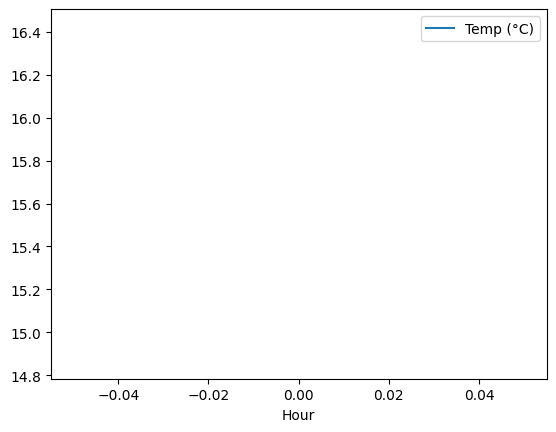

In [15]:
temperatures = weather_mar2012[[u'Temp (°C)']].copy()
print(temperatures.head)
temperatures.loc[:,'Hour'] = weather_mar2012.index.hour
temperatures.groupby('Hour').aggregate(np.median).plot()

So it looks like the time with the highest median temperature is 2pm. Neat.

## Getting the whole year of data


## Adding a 'weekday' column to our dataframe

Okay, so what if we want the data for the whole year? Ideally the API would just let us download that, but I couldn't figure out a way to do that.

First, let's put our work from above into a function that gets the weather for a given month.

I noticed that there's an irritating bug where when I ask for January, it gives me data for the previous year, so we'll fix that too. [no, really. You can check =)]

In [16]:
def download_weather_month(year=2012, month=1):
    url = url_template.format(year=year, month=month)
    asset = ds.assets[url]
    weather_data = asset.mock
    weather_data = weather_data.dropna(axis=1)
    return weather_data

We can test that this function does the right thing:



In [17]:
download_weather_month(2012, 1)[:5]

,Temp (°C),Rel Hum (%),Wind Spd (km/h),Visibility (km),Stn Press (kPa),Weather
2010-06-01,13.320248,78,24,29.721695,68.389927,"Snow Showers,Fog"
2010-06-02,24.892858,50,24,1.766590,65.831201,"Thunderstorms,Heavy Rain Showers"
2010-06-03,16.613007,76,16,10.853522,94.481127,"Snow Showers,Fog"
2010-06-04,-0.275604,98,15,5.789525,77.400019,"Freezing Drizzle,Haze"
2010-06-05,25.281888,60,30,25.995783,69.181838,"Rain Showers,Fog"


Now we can get all the months at once. This will take a little while to run.



In [18]:
data_by_month = [download_weather_month(2012, i) for i in range(1, 13)]

Once we have this, it's easy to concatenate all the dataframes together into one big dataframe using pd.concat. And now we have the whole year's data!

In [19]:
# from pandas.dataframe import DataFrame

In [20]:

# from pandas.core.dtypes.generic import ABCDataFrame

In [21]:
# ABCDataFrame??

In [22]:
weather_2012 = pd.concat(data_by_month)
# weather_2012

In [24]:
weather_2012

,Temp (°C),Rel Hum (%),Wind Spd (km/h),Visibility (km),Stn Press (kPa),Weather
2010-06-01,13.320248,78,24,29.721695,68.389927,"Snow Showers,Fog"
2010-06-02,24.892858,50,24,1.766590,65.831201,"Thunderstorms,Heavy Rain Showers"
2010-06-03,16.613007,76,16,10.853522,94.481127,"Snow Showers,Fog"
2010-06-04,-0.275604,98,15,5.789525,77.400019,"Freezing Drizzle,Haze"
2010-06-05,25.281888,60,30,25.995783,69.181838,"Rain Showers,Fog"
...,...,...,...,...,...,...
2012-06-09,7.914114,81,28,26.849328,73.890996,"Rain,Fog"
2012-06-10,35.131599,98,4,37.428021,56.435623,"Rain,Snow"
2012-06-11,4.370810,91,23,19.914401,90.628045,Mostly Cloudy
2012-06-12,10.796881,93,20,5.222468,51.374028,"Snow,Haze"


## Putting it together

Now we want to request the full code execution.

Let's put all that together, to prove how easy it is. 6 lines of magical pandas!

If you want to play around, try changing sum to max, numpy.median, or any other function you like.

In [16]:
# Todo, fix indexes in function

In [17]:
@sy.syft_function(input_policy=sy.ExactMatch(bikes=asset.mock),
                  output_policy=sy.SingleExecutionExactOutput())
def get_bike_hist(bikes):
    # TODO

Request code execution

In [18]:
req = guest_domain_client.api.services.code.request_code_execution(get_bike_hist)

In [19]:
submitted_code = guest_domain_client.code[0]

In [20]:
assert guest_domain_client.api.services.code.get_all()

Create and submit project

In [21]:
new_project = sy.Project(name="Pandas Chapter 5",
                         description="Hi, get all weather data for 2012")

In [22]:
new_project.add_request(obj=submitted_code, permission=sy.UserCodeStatus.EXECUTE)

In [23]:
guest_domain_client.submit_project(new_project)

<class 'syft.core.node.new.response.SyftSuccess'>: Project Submitted